# **Portada**

---



**Proyecto Fin de Módulo de Python 2025**

**Título:** Análisis General del Mercado de Aplicaciones Móviles en Google Play

**Autor:** Ignacio Arroyo Mantero

**Fecha:** 19/07/2025



# **Índice**

---



>[Portada](#scrollTo=76utn76Tymbx)

>[Índice](#scrollTo=LrkMZaM8yqfw)

>[Introducción](#scrollTo=O4ISUfKS0f0h)

>[Análisis de los datos](#scrollTo=MeVa5L0Q01Z5)

>>[Librerías y Paquetes](#scrollTo=nQH0cld9VjRY)

>>[Obtención de los datos](#scrollTo=Gt6rK0K1WX01)

>>[Limpieza y Transformaciones de los Datos](#scrollTo=pwVbEh1VWfF9)

>>>[Comprobación nombres de columnas](#scrollTo=YBMudzVuWuL0)

>>>[Gestión de valores nulos y duplicados](#scrollTo=_XqPEL6QW1bd)

>>>[Obtención de valoraciones nulos mediante web scraping](#scrollTo=EK3-vLt6Nmdp)

>>>[Validación y Comprobación de Datos](#scrollTo=-ClpRiRAW_7V)

>>[Análisis Exploratorio Final](#scrollTo=BDGJQVZoWj_V)

>>>[Análisis general del mercado](#scrollTo=Pq7e1oL5ZNK2)

>>>[Estudio de las aplicaciones gratuitas](#scrollTo=8vDLDbeZawFu)

>>>[Impacto de anuncios y compras dentro de la app](#scrollTo=11AvwZ3ea2r2)

>[Conclusiones](#scrollTo=-uEzlza41PtJ)

>>[Conclusiones del análisis](#scrollTo=caedr83V0qfM)

>>[Opciones de mejora](#scrollTo=4sp7xYp306FZ)

>>[Conclusión Final](#scrollTo=WykgjvCZ20kS)

>[Referencias](#scrollTo=vhkMektJAHhy)

>[Uso de la IA](#scrollTo=ZSfSoE10ALBi)



# **Introducción**

---

En la actualidad, el teléfono móvil se ha convertido en un dispositivo indispensable en la vida cotidiana de la persona moderna. Su uso e influencia constante han transformado por completo la manera en que nos comunicamos, accedemos a la información, al entretenimiento y a una amplia variedad de servicios y herramientas. Por ello, las aplicaciones móviles se han consolidado como uno de los principales canales de prestación de servicios por parte de las empresas hacia sus clientes, reforzando la posición del mercado de aplicaciones móviles como uno de los más relevantes dentro de la industria tecnológica. Este crecimiento ha sido impulsado por plataformas como Google Play, que permiten a desarrolladores independientes y grandes empresas compartir un mismo ecosistema, fomentando así la competitividad, la innovación y la evolución constante del sector.

Dentro de este ecosistema, las aplicaciones gratuitas dominan en número, muchas de ellas financiadas mediante modelos alternativos como la publicidad integrada o las compras dentro de la aplicación. Estos canales de ingreso, junto a la facilidad con la que los usuarios pueden valorar y opinar sobre los productos digitales, generan un entorno donde la percepción pública influye directamente en su éxito comercial. Comprender cómo obtener rentabilidad sin comprometer la experiencia del usuario es fundamental para los desarrolladores que buscan posicionar sus creaciones en el mercado.

Con el fin de analizar el potencial de emprendimiento en el sector de las aplicaciones móviles, este proyecto se centra en el estudio de las opiniones de los usuarios y su relación con los distintos modelos de monetización presentes en Google Play. A través de un análisis de datos, se pretende identificar patrones de comportamiento del mercado y comprender cómo influyen factores como la gratuidad, la inclusión de anuncios o los micropagos en las valoraciones y descargas de las aplicaciones.

Los objetivos principales del proyecto son:

- Realizar un análisis general del mercado de aplicaciones móviles a partir de datos recogidos de Google Play.

- Estudiar el porcentaje de adopción de modelos gratuitos en cada categoría y comparar su impacto en la valoración frente a aplicaciones similares de pago

- Analizar la relación entre la presencia de compras integradas o anuncios y métricas clave como las descargas y las valoraciones de los usuarios.

# **Análisis de los datos**

---



En esta sección se detalla el proceso completo de análisis de los datos de un conjunto compuesto por más de **2,3 millones** de aplicaciones móviles publicadas en Google Play. El trabajo abarca desde la preparación inicial de las librerías necesarias y la carga del conjunto de datos hasta las tareas de limpieza, validación y análisis exploratorio.

El objetivo es garantizar la calidad y fiabilidad de los datos utilizados y obtener conocimiento relevante sobre patrones y dinámicas del sector para apoyar a futuros desarrolladores interesados en emprender en el mercado de aplicaciones móviles.

## **Librerías y Paquetes**

---



Para el análisis y la visualización de los datos se emplearán las siguientes librerías y paquetes.


In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install textblob
!pip install google-play-scraper

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import requests
from textblob import TextBlob
from google_play_scraper import app
from io import StringIO
import ast
from pandas.tseries.offsets import DateOffset

## **Obtención de los datos**

---



El conjunto de datos utilizado está alojado en un [repositorio público de  GitHub](https://github.com/Ignarrman/cei-python-2025) en formato CSV. Para su descarga y posterior carga en el entorno de análisis se emplearon las librerías requests y pandas, respectivamente.

In [3]:
# Obtenemos el archivo CSV de manera remota mediante requests
file_url = "https://media.githubusercontent.com/media/Ignarrman/cei-python-2025/main/code/resources/Google-Playstore.csv"
file_response = requests.get(file_url)

# Cargamos el CSV obtenido en un DataFrame de pandas
df = pd.read_csv(StringIO(file_response.text))
pd.set_option('display.max_columns', None) # Fuerza la aparición de todas las columnas al vizualizar

df.head(3)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,7.1 and up,Jean Confident IrÃ©nÃ©e NIYIZIBYOSE,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,5.0 and up,Webserveis,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,4.0.3 and up,Cabin Crew,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35


In [4]:
print(df.dtypes)

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

Al observar los tipos de datos (dtypes, dinfo) del DataFrame, se aprecia que la mayoría de las columnas están registradas como tipo object, incluso algunas que deberían contener valores numéricos o fechas. Esto indica que será necesario realizar una validación en profundidad de los datos en dichas columnas.

In [6]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


Debido a la presencia de datos inconsistentes y formatos incorrectos, la capacidad de `describe()` de calcular estadísticas generales está severamente limitada hasta que terminemos el proceso de limpieza y validación de los datos.

## **Limpieza y Transformaciones de los Datos**

---



Antes de iniciar el proceso de limpieza y validación, se establece como índice del `DataFrame` la columna **App Id**, el identificador único de cada aplicación en Google Play.

In [7]:
df.set_index('App Id',inplace=True)

### Comprobación nombres de columnas

Como primer paso, se comprueban los nombres de las columnas para descartar posibles errores o incoherencias.

In [8]:
columns = df.columns
columns

Index(['App Name', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

Como no hay anomalías o errores en los nombres no es necesario ninguna acción correctiva.

### Gestión de valores nulos y duplicados

Para iniciar la depuración de valores nulos, es necesario analizar primero la cantidad y proporción de entradas vacías por columna antes de aplicar técnicas de eliminación o imputación.

In [9]:
print("Cantidad de valores nulos por columna \n".upper())
print(df.isnull().sum().sort_values(ascending=False))

print("\n-------------------------------------------------------------\n")

print("Porcentaje de valores nulos por columna\n".upper())
print(round(df.isnull().sum().sort_values(ascending=False)/df.shape[0]*100,4))

CANTIDAD DE VALORES NULOS POR COLUMNA 

Developer Website    760835
Privacy Policy       420953
Released              71053
Rating Count          22883
Rating                22883
Minimum Android        6530
Size                    196
Currency                135
Installs                107
Minimum Installs        107
Developer Id             33
Developer Email          31
App Name                  5
Maximum Installs          0
Category                  0
Price                     0
Free                      0
Last Updated              0
Content Rating            0
Ad Supported              0
In App Purchases          0
Editors Choice            0
Scraped Time              0
dtype: int64

-------------------------------------------------------------

PORCENTAJE DE VALORES NULOS POR COLUMNA

Developer Website    32.8947
Privacy Policy       18.1999
Released              3.0720
Rating Count          0.9893
Rating                0.9893
Minimum Android       0.2823
Size                  0.

Se eliminarán las filas con valores nulos en las columnas clave para el análisis, como **App Name**, **Installs** y **Minimum Installs**, mientras que en otras columnas secundarias se ha optado por reemplazarlos con la etiqueta `Unspecified` para mantener la integridad del conjunto de datos sin comprometer el análisis posterior.

In [10]:
df["Rating"] = df["Rating"].fillna(value="Unspecified")
df["Rating Count"] = df["Rating Count"].fillna(value="Unspecified")
df["Installs"] = df["Installs"].fillna(value="Unspecified")
df["Minimum Installs"] = df["Minimum Installs"].fillna(value="Unspecified")
df["Currency"] = df["Currency"].fillna(value="Unspecified")
df["Size"] = df["Size"].fillna(value="Unspecified")
df["Minimum Android"] = df["Minimum Android"].fillna(value="Unspecified")
df["Developer Id"] = df["Developer Id"].fillna(value="Unspecified")
df["Developer Website"] = df["Developer Website"].fillna(value="Unspecified")
df["Developer Email"] = df["Developer Email"].fillna(value="Unspecified")
df["Released"] = df["Released"].fillna(value="Unspecified")
df["Privacy Policy"] = df["Privacy Policy"].fillna(value="Unspecified")

df = df.dropna(subset=['App Name', 'Installs', 'Minimum Installs'], axis= 0)

df.isnull().sum()

,0
App Name,0
Category,0
Rating,0
Rating Count,0
Installs,0
Minimum Installs,0
Maximum Installs,0
Free,0
Price,0
Currency,0


Una vez gestionado la depuración de valores nulos procedemos a identificar la cantidad de entradas duplicadas en el conjunto de datos.

In [11]:
duplicated_rows = df.duplicated()
duplicated_rows.loc[duplicated_rows == True]

,0
App Id,


No se detecta ninguna fila duplicada en el conjunto de datos por lo que no es necesario aplicar actividades correctivas.

### Obtención de valoraciones nulos mediante web scraping

Con el fin de recuperar la mayor cantidad posible de valores ausentes, se intentará aplicar **web scraping** directamente sobre Google Play.

In [12]:
# Localiza los Ratings nulos y los convierte en una lista para facilitar su uso posteriormente
unspecified_ratings = df.loc[(df['Rating'] == "Unspecified")]
app_id_unspecified_ratings = list(unspecified_ratings.index)

Las siguientes dos celdas de código están destinadas a realizar el web scraping y almacenar los resultados en un diccionario. Posteriormente, sus claves y valores se guardan en los archivos file_keys.txt y file_values.txt.

Sin embargo, debido a la gran duración del proceso, estas celdas se han dejado comentadas. En su lugar, se utilizan directamente archivos, localizados en el mismo repositorio que el conjunto de datos original, con los resultados previamente generados.

In [13]:
'''
values = list()
keys = app_id_unspecified_ratings
for app_id in app_id_unspecified_ratings:
  try:
    # Se intenta realizar el web scraping, el output será un diccionario
    result = app(app_id = app_id)
    values.append(result)
  except Exception as e:
    # En caso de error se elimina la key
    keys.remove(app_id)

app_id_scrapped_result = dict(zip(keys,values))
'''

'\nvalues = list()\nkeys = app_id_unspecified_ratings\nfor app_id in app_id_unspecified_ratings:\n  try:\n    # Se intenta realizar el web scraping, el output será un diccionario\n    result = app(app_id = app_id)\n    values.append(result)\n  except Exception as e:\n    # En caso de error se elimina la key\n    keys.remove(app_id)\n\napp_id_scrapped_result = dict(zip(keys,values))\n'

In [14]:
# Guarda resultados del diccionario en dos archivos
'''
with open('file_keys.txt', 'w') as f:
    for key in keys:
        f.write('{}\n'.format(key))
    f.close()

with open('file_values.txt', 'w') as f:
    for value in values:
        f.write('{}\n'.format(value))
    f.close()
'''

"\nwith open('file_keys.txt', 'w') as f:\n    for key in keys:\n        f.write('{}\n'.format(key))\n    f.close()\n\nwith open('file_values.txt', 'w') as f:\n    for value in values:\n        f.write('{}\n'.format(value))\n    f.close()\n"

In [15]:
# Recupera los datos de ficheros remotos mediante requests
keys_url = "https://raw.githubusercontent.com/Ignarrman/cei-python-2025/refs/heads/main/code/resources/file_keys.txt"
keys_response = requests.get(keys_url)

values_url = "https://raw.githubusercontent.com/Ignarrman/cei-python-2025/refs/heads/main/code/resources/file_values.txt"
values_response = requests.get(values_url)

# Separa los valores en el fichero usando como separador los saltos de línea
keys = keys_response.text.splitlines()
values_dicts = values_response.text.splitlines()

# Debido a que los valores están en formato string por lo que hay que transformarlos en diccionarios
values = [ast.literal_eval(line) for line in values_dicts] #The values are strings and we need to transform them into dicts

In [16]:
scrapping_result = dict(zip(keys,values))

# Se comprueban las app que dieron error durante el proceso de scraping
rows_with_no_scrapped_rating = [index for index in app_id_unspecified_ratings if index not in scrapping_result.keys()]

#Limpiamos el diccionarios de las app que no se pudieron obtener los datos
clean_scrapping_result = {key: values for key,value in scrapping_result.items() if key not in rows_with_no_scrapped_rating}

# Se eliminan las entradas no obtenidas
df = df.drop(index=rows_with_no_scrapped_rating, axis=0)

# Actualizar Ratings con los valores obtenidos
score_series = pd.Series({k: round(v[0]['score']) for k, v in clean_scrapping_result.items()})
df.loc[score_series.index, 'Rating'] = score_series

# Comprobar que no queda ninguno
df.loc[(df["Rating"] == "Unspecified")]

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
App Id,,,,,,,,,,,,,,,,,,,,,,,


### Validación y Comprobación de Datos

Antes de validar los valores numéricos y lógicos, se revisaron primero las columnas con valores categóricos limitados a un conjunto cerrado predefinido, como la columna de Category, con el objetivo de detectar posibles errores o redundancias.

In [17]:
# Muestra los diferentes valores en la columna Category
df["Category"].value_counts()

,count
Category,
Education,239871
Music & Audio,154611
Business,142257
Tools,142111
Entertainment,137626
Lifestyle,117796
Books & Reference,116509
Personalization,89029
Health & Fitness,82653


Tras observar los resultados, las categorías Music y Education se consideraron redundantes y se agruparon bajo Music & Audio y Educational, respectivamente.

In [18]:
# Sustituye Music por Music & Audio y Education por Educational
df.loc[(df["Category"] == "Music"), "Category"] = "Music & Audio"
df.loc[(df["Category"] == "Education"), "Category"] = "Educational"

A continuación, se validaran los valores numéricos y lógicos mediante un conjunto de funciones auxiliares, comprobando qué registros no cumplen con los criterios de validez establecidos para cada columna y aplicando medidas correctivas en cada caso

In [19]:

'''
---------------- CRITERIOS DE VALIDEZ A SEGUIR POR COLUMNA ----------------

- Ratings rango de valores entre 0 y 5
- Rating Count no puede haber valores negativos
- Installs no puede haber valores negativos
- Min installs no puede haber valores negativos
- Max installs no puede haber valores negativos
- Free tiene que ser True o False
- Size no puede haber valores negativos
- Developer website valores deben contener http, https o Unspecified
- Developer email valores tienen que ser un email (Usar re patterns para esto) o Unspecified
- Privacy Policy website valores deben contener http, https o Unspecified
- Ad Supported tiene que ser True o False
- In App Purchases tiene que ser True o False

'''

def is_valid_rating(value):
    try:
        val = float(value)
        return 0 <= val <= 5
    except:
        return False

def is_non_negative_number(value):
    try:
      if isinstance(value, str):
        return value.lower() == "unspecified" or value.lower() == "varies with device" or float(value[:-1].replace(',', '')) >= 0
      if isinstance(value, int):
        return int(value) >= 0
    except:
      return False

def is_valid_bool_string(value):
    return str(value).strip().lower() in ["true", "false"]

def is_valid_url_or_unspecified(value):
    val = str(value).strip().lower()
    return val.startswith("http") or val == "unspecified"

def is_valid_email_or_unspecified(value):
    val = str(value).strip()
    import re
    EMAIL_REGEX = r'^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$'
    return val.lower() == "unspecified" or re.match(EMAIL_REGEX, val) is not None


In [20]:
# Se aplican las funciones y se comprueban resultados
rating_ok = df['Rating'].apply(is_valid_rating).all()
rating_count_ok = df['Rating Count'].apply(is_non_negative_number).all()
installs_ok = df['Installs'].apply(is_non_negative_number).all()
min_installs_ok = df['Minimum Installs'].apply(is_non_negative_number).all()
max_installs_ok = df['Maximum Installs'].apply(is_non_negative_number).all()
free_ok = df['Free'].apply(is_valid_bool_string).all()
ad_supported_ok = df['Ad Supported'].apply(is_valid_bool_string).all()
in_app_purchases_ok = df['In App Purchases'].apply(is_valid_bool_string).all()
size_ok = df['Size'].apply(is_non_negative_number).all()
developer_website_ok = df['Developer Website'].apply(is_valid_url_or_unspecified).all()
privacy_policy_ok = df['Privacy Policy'].apply(is_valid_url_or_unspecified).all()
developer_email_ok = df['Developer Email'].apply(is_valid_email_or_unspecified).all()

print("Rating OK:", rating_ok)
print("Rating Count OK:", rating_count_ok)
print("Installs OK:", installs_ok)
print("Min Installs OK:", min_installs_ok)
print("Max Installs OK:", max_installs_ok)
print("Free OK:", free_ok)
print("Ad Supported OK:", ad_supported_ok)
print("In App Purchases OK:", in_app_purchases_ok)
print("Size OK:", size_ok)
print("Developer Website OK:", developer_website_ok)
print("Privacy Policy OK:", privacy_policy_ok)
print("Developer Email OK:", developer_email_ok)

Rating OK: True
Rating Count OK: True
Installs OK: True
Min Installs OK: True
Max Installs OK: True
Free OK: True
Ad Supported OK: True
In App Purchases OK: True
Size OK: True
Developer Website OK: False
Privacy Policy OK: False
Developer Email OK: False


Como podemos hay varias entradas que no cumplen con los criterios de validez impuestos para las columnas de **Developer Website**, **Privacy Policy** y **Developer Email**.

Empezamos comprobando los valores que no cumplen los requisitos en la columna de **Developer Website**.

In [21]:
df.loc[df['Developer Website'].apply(is_valid_url_or_unspecified) == False]['Developer Website'].value_counts()

,count
Developer Website,
about:invalid#zGuavaz,1


Se debe a un error en el conjunto original de datos al intentar poner la url de la página. Como medida correctiva lo reemplazaremos por el valor `Unspecified`.

In [22]:
df.loc[df['Developer Website'].apply(is_valid_url_or_unspecified) == False, 'Developer Website'] = "Unspecified"
df.loc[df['Developer Website'].apply(is_valid_url_or_unspecified) == False]['Developer Website'].value_counts()

,count
Developer Website,


Podemos comprobar que ocurre el mismo error para la columna de **Privacy Policy** por lo que aplicaremos las mismas medidas.

In [23]:
df.loc[df['Privacy Policy'].apply(is_valid_url_or_unspecified) == False]['Privacy Policy'].value_counts()

,count
Privacy Policy,
about:invalid#zGuavaz,6


In [24]:
df.loc[df['Privacy Policy'].apply(is_valid_url_or_unspecified) == False, 'Privacy Policy'] = "Unspecified"
df.loc[df['Privacy Policy'].apply(is_valid_url_or_unspecified) == False]['Privacy Policy'].value_counts()

,count
Privacy Policy,


Para la columna de **Developer Email** los valores inválidos se tratan de direcciones de correo con formatos no admitidos por lo que tiraremos dichas entradas.

In [25]:
df.loc[df['Developer Email'].apply(is_valid_email_or_unspecified) == False]['Developer Email'].value_counts()

,count
Developer Email,
John.O'Neal@greensboro.com,5
#au-isobar-team-development-mobile@dentsuaegis.com,3
anchorR&D@anchor-world.com,3
ETHICS&COMPLIANCE@nee.com,3
#MobileAppSupport@commscope.com,3
...,...
info@ums_helper.net,1
CNDBrandMktg&BizDevGroup@condenast.com,1
no_reply@wire67.com?body=SVP%20utilisez%20le%20formulaire%20ici%20http%3A%2F%2Fwire67.com%3Ft3g,1


In [26]:
df = df.drop(df.loc[df['Developer Email'].apply(is_valid_email_or_unspecified) == False].index, axis=0)
df.loc[df['Developer Email'].apply(is_valid_email_or_unspecified) == False]['Developer Email'].value_counts()

,count
Developer Email,


## **Análisis Exploratorio Final**

---



Terminada la limpieza y validación de los datos se procede a realizar el análisis exploratorio final comenzando con un estudio general del mercado de aplicaciones móviles.

Analizaremos la distribución de valoraciones de los usuarios, el porcentaje de aplicaciones aparentemente deprecadas (sin actualizaciones en los últimos dos años), la media de valoración por categoría y las cinco apps mejor valoradas dentro de cada una.

### Análisis general del mercado

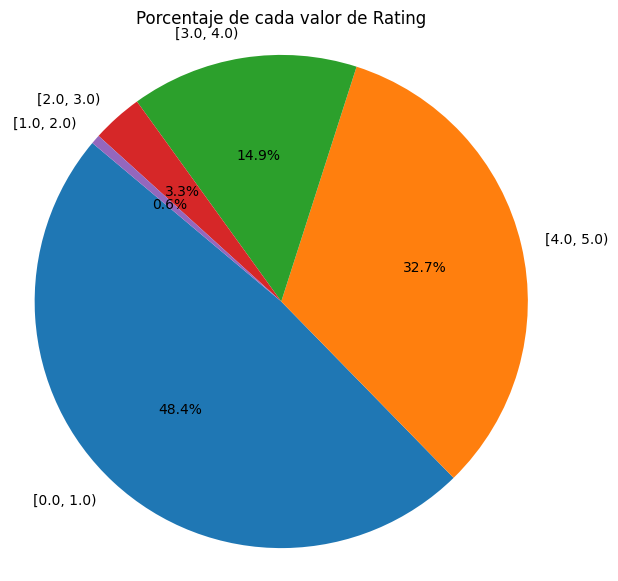

In [27]:
# Seleccionamos datos
ratings_clean = df.loc[df['Rating'] != "Unspecified",'Rating']

# Agrupamos datos en rangos de 0 a 5 con saltos de 1.0 (0.0, 1.0, 2.0, 3.0, 4.0, 5.0)
bins = pd.interval_range(start=0, end=5, freq=1.0, closed='left')
ratings_values_grouped = pd.cut(ratings_clean, bins=bins).value_counts()

# Crea gráfico
plt.figure(figsize=(7,7))
plt.pie(ratings_values_grouped, labels=ratings_values_grouped.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de cada valor de Rating')
plt.axis('equal')
plt.show()

Como se observa en el gráfico, las valoraciones de los usuarios tienden a concentrarse en los extremos. Cerca del 48,4% de las aplicaciones tienen puntuaciones entre 0 y 1, mientras que un 32,8% superan el 4. Esta polarización indica que los usuarios suelen valorar solo cuando tienen experiencias muy positivas o muy negativas. Por ello, los desarrolladores deben esforzarse en cumplir las expectativas del público, ya que una mala valoración puede afectar seriamente la imagen y el éxito comercial de la aplicación.

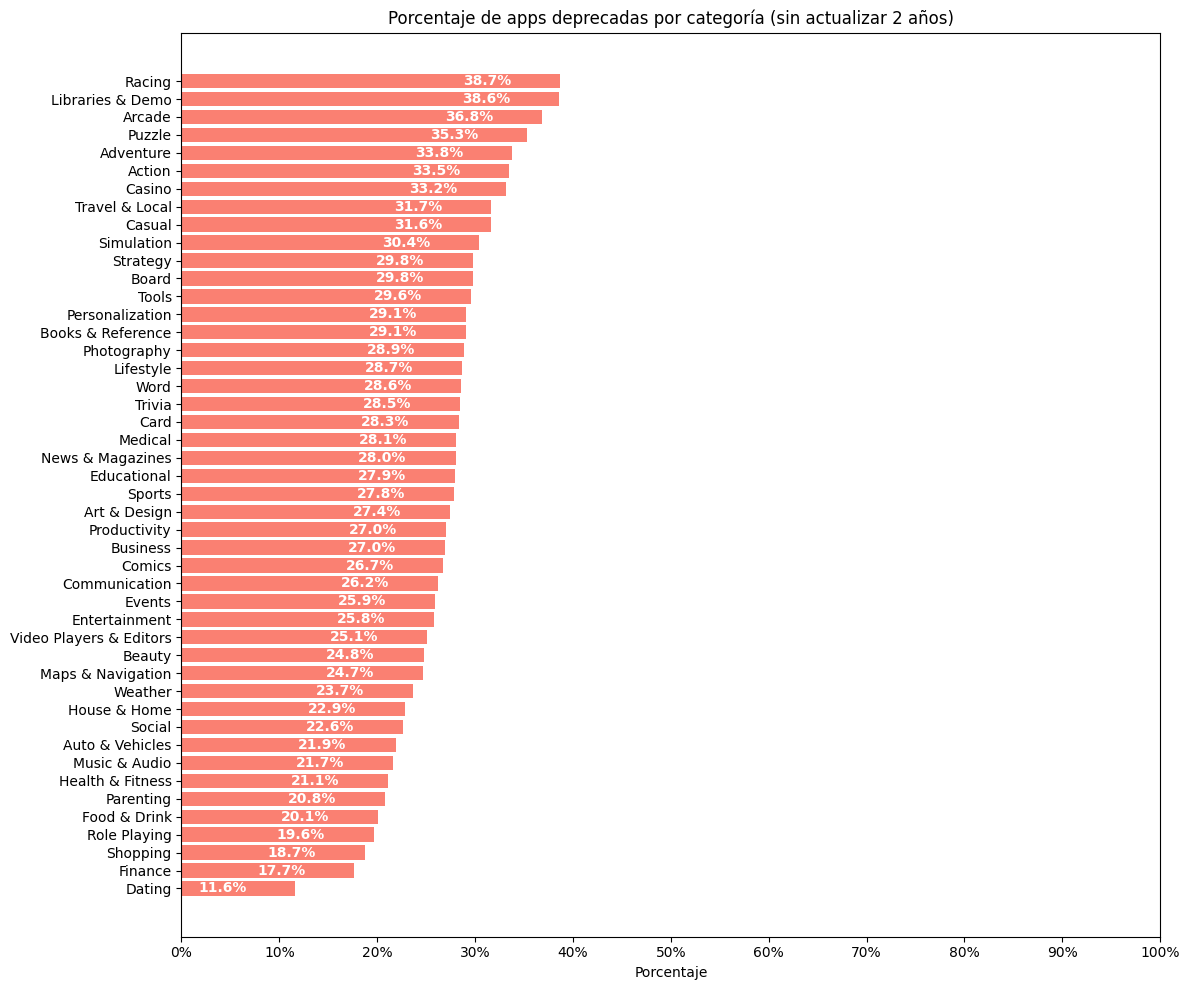

In [28]:
# Seleccionamos datos
# Los datos del dataset original son de Junio de 2021 por lo hay que mirar a partir de esa fecha
two_years_ago = cutoff_date = pd.Timestamp('2019-06-01')
deprecated_clean = df.loc[df['Last Updated'] != "Unspecified", 'Last Updated']
deprecated_clean = pd.to_datetime(deprecated_clean, format='%b %d, %Y') # Transformar datos objeto datetime para realizar comparativa
deprecated_clean = deprecated_clean < two_years_ago

# Agrupar datos seleccionados por categoría y calcular porcentaje
deprecation_per_category = deprecated_clean.groupby(df['Category']).mean().sort_values() * 100

# Crear gráfico
plt.figure(figsize=(12, 10))
bars = plt.barh(deprecation_per_category.index, deprecation_per_category.values, color='salmon')
plt.title('Porcentaje de apps deprecadas por categoría (sin actualizar 2 años)')
plt.xlabel('Porcentaje')

# Mostrar el valor dentro de la barra
for bar in bars:
    width = bar.get_width()
    plt.text(width - 5, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center', ha='right', color='white', fontweight='bold')

plt.xticks(range(0, 101, 10), [f'{x}%' for x in range(0, 101, 10)])
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


En las primeras posiciones se sitúan categorías correspondientes principalmente al sector del entretenimiento (Racing, Arcade, Puzzle, Adventure, Action, Casino, Casual y Simulation), todas ellas con tasas de abandono superiores al 30%. Este comportamiento podría explicarse por la alta competencia y rotación de juegos móviles, donde muchos títulos pierden rápidamente relevancia o rentabilidad.

En el caso de las aplicaciones de librerías o demostración, su corta vida útil suele estar ligada a su carácter experimental o de soporte puntual para desarrolladores.

Por el contrario, categorías como Shopping, Finance y Dating presentan porcentajes considerablemente menores de aplicaciones desactualizadas. Se trata de sectores donde la confianza del usuario, la actualización constante de contenido y la adaptación a cambios del mercado son factores clave para la permanencia y el éxito de este tipo de aplicaciones.

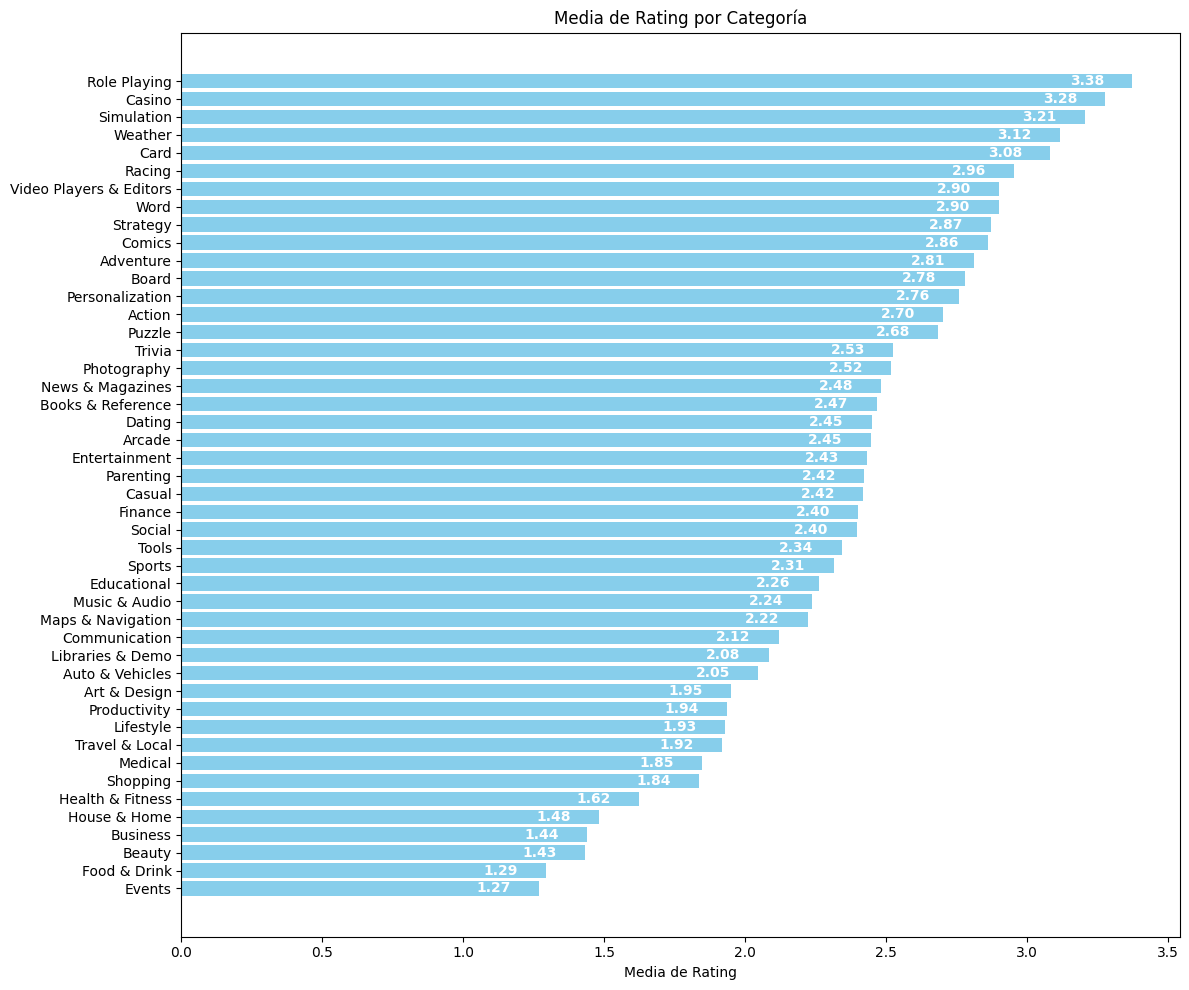

In [29]:
# Seleccionamos datos
ratings_clean = df.loc[df['Rating'] != "Unspecified", 'Rating']

# Agrupar datos seleccionados por categoría
ratings_per_category = ratings_clean.groupby(df['Category']).mean().sort_values()

# Crea gráfico
plt.figure(figsize=(12, 10))
bars = plt.barh(ratings_per_category.index, ratings_per_category.values, color='skyblue')
plt.title('Media de Rating por Categoría')
plt.xlabel('Media de Rating')

# Mostrar el valor dentro de la barra
for bar in bars:
    width = bar.get_width()
    plt.text(width - 0.1, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='right', color='white', fontweight='bold')

plt.tight_layout()
plt.show()


Los resultados muestran que solo unas pocas categorías, como Role Playing, Casino, Simulation, Weather y Card, alcanzan una valoración promedio superior a 3.0, lo que indica que, en general, los usuarios perciben una calidad más alta en estas áreas. Por otro lado, la mayoría de las categorías se sitúan entre 2.2 y 3.0, reflejando una satisfacción moderada con los servicios ofrecidos.

Categorías como Events y Food & Drink, con puntuaciones por debajo de 1.3, junto con otras como Business, House & Home o Health & Fitness, que están en rangos bajos (1.4 a 1.8), sugieren que los usuarios son más críticos con estos sectores o que las aplicaciones de estas categorías tienen más dificultades para cumplir las expectativas. Es posible también que estos tipos de apps, por la naturaleza de su servicio, generen con mayor facilidad frustración o descontento entre sus usuarios.

Aunque las valoraciones tienden a concentrarse en los extremos, las puntuaciones intermedias (entre 1 y 3) representan un porcentaje mucho menor. Esto sugiere que, pese a las medias moderadas por categoría, la realidad del mercado está marcada por una alta presencia de aplicaciones con valoraciones muy bajas o muy altas, lo que acaba equilibrando los promedios finales.

Para comprobar esta distribución polarizada, se observan las cinco aplicaciones mejor valoradas de cada categoría. Esto permite ver si las altas medias se deben a unos pocos casos destacados, reforzando la idea de que conviven pocas apps muy valoradas con muchas de baja valoración.

In [30]:
# Seleccionamos 5 mejores datos por rating y agrupamos por categoría
ratings_per_category = ratings_clean.groupby(df['Category']).mean().sort_values(ascending=False).index

counter = 0 # Limitador que restrige la visualización a solo 3 categorías

# Muestra las 5 entradas del dataset por cada categoría (solo columnas Category y Rating)
for category in ratings_per_category:
    counter +=1 # Comentar esta línea para ver todas, se añadió para mantener limpieza del pdf final al ser muchas categorías
    if counter <= 5:
      print(f"\n\n\n################################## Top 5 {category} Apps by Rating ##################################\n")
      top_5_apps_category = df.loc[df['Category'] == category, ['Category', 'Rating']].sort_values('Rating', ascending=False).head(5)
      display(top_5_apps_category)
    else:
      break





################################## Top 5 Role Playing Apps by Rating ##################################



,Category,Rating
App Id,,
com.LDStudio.pandalaunch,Role Playing,5.0
com.sanguozhi.shenmo,Role Playing,5.0
com.SpaceGuy.SquareProjectRPG,Role Playing,5.0
com.gp.luxury.modern.car.parking.challenge.carparkingTypeamessage,Role Playing,5.0
com.wonderstackgames.zombieencounter,Role Playing,5.0





################################## Top 5 Casino Apps by Rating ##################################



,Category,Rating
App Id,,
org.betacode.cinepoker,Casino,5.0
de.seventythirty.orbslots,Casino,5.0
com.mohtarif.weddingprincess,Casino,5.0
a4prince.tangiersoccer,Casino,5.0
com.tncute.baucua4d.gamedangian,Casino,5.0





################################## Top 5 Simulation Apps by Rating ##################################



,Category,Rating
App Id,,
eu.itunix.life,Simulation,5.0
com.elderaeons.frontier,Simulation,5.0
com.ErkinKarakoc.NewWorldofPirates,Simulation,5.0
com.TrajanLLC.TwistRing,Simulation,5.0
com.tfg.derby.dodge.ram.demolition,Simulation,5.0





################################## Top 5 Weather Apps by Rating ##################################



,Category,Rating
App Id,,
com.gkstudio.tiger.robot.transform.car.robot.games,Weather,5.0
com.spider.rope.hero.gorilla.robot.transformers.games,Weather,5.0
com.hdmdmi.today1,Weather,5.0
com.madattack.fps.commando.shooting.strike,Weather,5.0
com.musketeers.counter.terrorist.shooter.game,Weather,5.0





################################## Top 5 Card Apps by Rating ##################################



,Category,Rating
App Id,,
ad.virtualverse.cardmaster,Card,5.0
com.Pixel8.StepPoker,Card,5.0
com.garfsapps.umgole,Card,5.0
com.sheetgames.paciencia,Card,5.0
com.zimbronapps.loteria_mixe,Card,5.0


### Estudio de las aplicaciones gratuitas

Una vez completado el análisis general, se procede a examinar el papel de las aplicaciones gratuitas en el mercado. Para ello, se analizará el porcentaje de adopción de esta práctica dentro de cada categoría y se compararán la media de valoraciones de las aplicaciones gratuitas frente a las de pago.

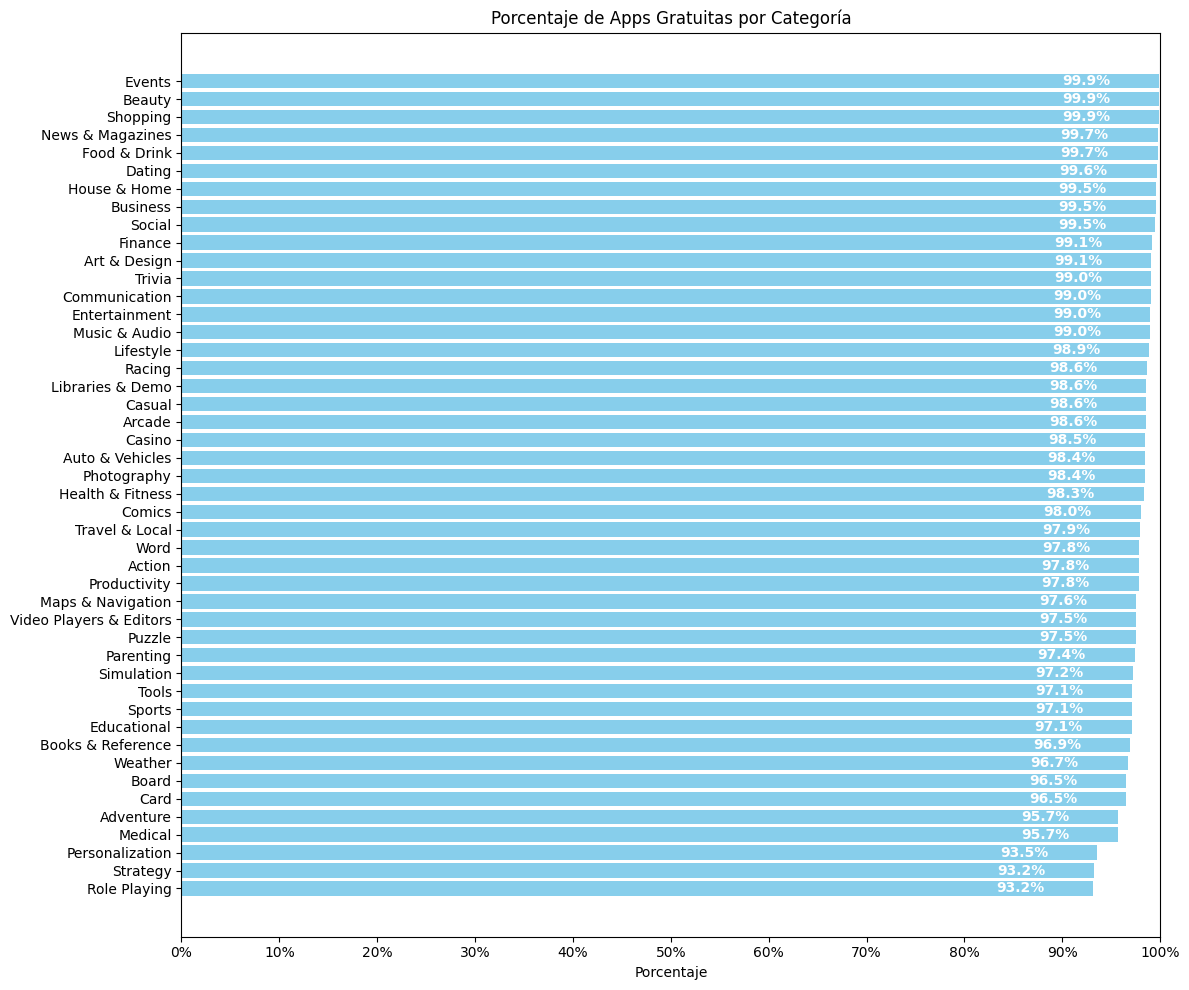

In [31]:
# Seleccionamos datos
free_clean = df.loc[df['Free'] != "Unspecified", 'Free']

# Agrupar por categoría y calcular el porcentaje
free_per_category = free_clean.groupby(df['Category']).mean().sort_values() * 100

# Crea gráfico
plt.figure(figsize=(12, 10))
bars = plt.barh(free_per_category.index, free_per_category.values, color='skyblue')
plt.title('Porcentaje de Apps Gratuitas por Categoría')
plt.xlabel('Porcentaje')

# Mostrar el valor dentro de la barra
for bar in bars:
    width = bar.get_width()
    plt.text(width - 5, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', va='center', ha='right', color='white', fontweight='bold')

plt.xticks(range(0, 101, 10), [f'{x}%' for x in range(0, 101, 10)])
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

Al analizar el porcentaje de aplicaciones gratuitas por categoría, se observa que la mayoría supera ampliamente el 97%, lo que confirma que ofrecer apps sin coste asociado es la norma en la industria. Las principales excepciones se encuentran en categorías como Strategy, Role Playing, Personalization, Medical y Adventure, apuntando a que en videojuegos y ciertos nichos concretos, el modelo de pago sigue siendo más habitual.

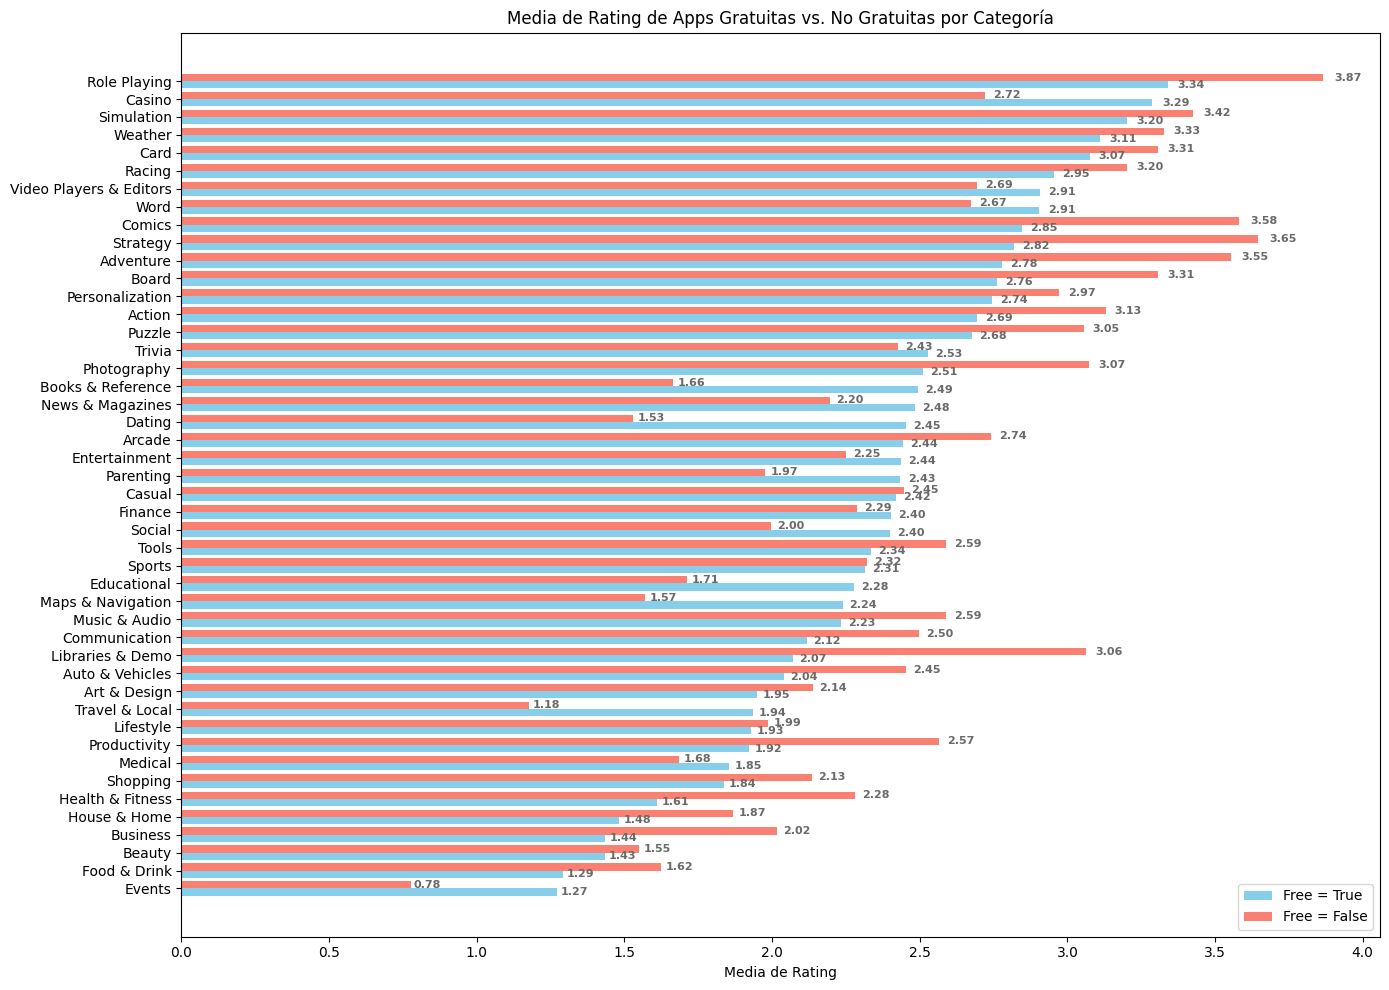

In [32]:
# Seleccionamos datos
ratings_clean = df.loc[df['Rating'] != "Unspecified"].copy()
ratings_clean['Rating'] = ratings_clean['Rating'].astype(float)

# Agrupar por categoría y si es gratuito o no, luego calcular media de Rating
ratings_by_free = ratings_clean.groupby(['Category', 'Free'])['Rating'].mean().unstack()

# Ordenar datos para mejor visualización
ratings_by_free = ratings_by_free.sort_values(by=True, ascending=True)

# Crea doble gráfico de barras horizontales
plt.figure(figsize=(14, 10))
bar_width = 0.4  # Barras un poco más anchas
index = range(len(ratings_by_free))

# Barras azules representan gratuitos
bars_free = plt.barh([i - bar_width/2 for i in index], ratings_by_free[True], bar_width, color='skyblue', label='Free = True')

# Barras rojas representan de pago
bars_paid = plt.barh([i + bar_width/2 for i in index], ratings_by_free[False], bar_width, color='salmon', label='Free = False')

plt.yticks(index, ratings_by_free.index)
plt.xlabel('Media de Rating')
plt.title('Media de Rating de Apps Gratuitas vs. No Gratuitas por Categoría')
plt.legend()

# Mostrar el valor fuera de la barra
for bars in [bars_free, bars_paid]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + (width * 0.01), bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', color='dimgray', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()


En general, se observa que las aplicaciones de pago tienden a recibir una valoración promedio más alta que las gratuitas, especialmente en el sector de los videojuegos, donde la calidad percibida parece correlacionarse con la inversión del usuario. Sin embargo, existen excepciones notables en categorías como Casino, Books & Reference, Dating, News & Magazines, Parenting, Maps & Navigation, Travel & Local y Events, donde las aplicaciones gratuitas superan en valoración a las de pago. Esto probablemente responde a la naturaleza y dinámica específica de estos sectores, donde algunas aplicaciones gratuitas líderes, como Google Maps o Tinder, establecen altos estándares de calidad y funcionalidad, dificultando la competencia para las versiones de pago o suscripciones.

### Impacto de anuncios y compras dentro de la app

Finalmente, se analiza el impacto que tienen los anuncios y las compras dentro de la aplicación en la percepción de los usuarios y la popularidad de las apps. Para ello, se comparan las valoraciones medias y el número medio de descargas entre aplicaciones que incluyen estas características y aquellas que no.

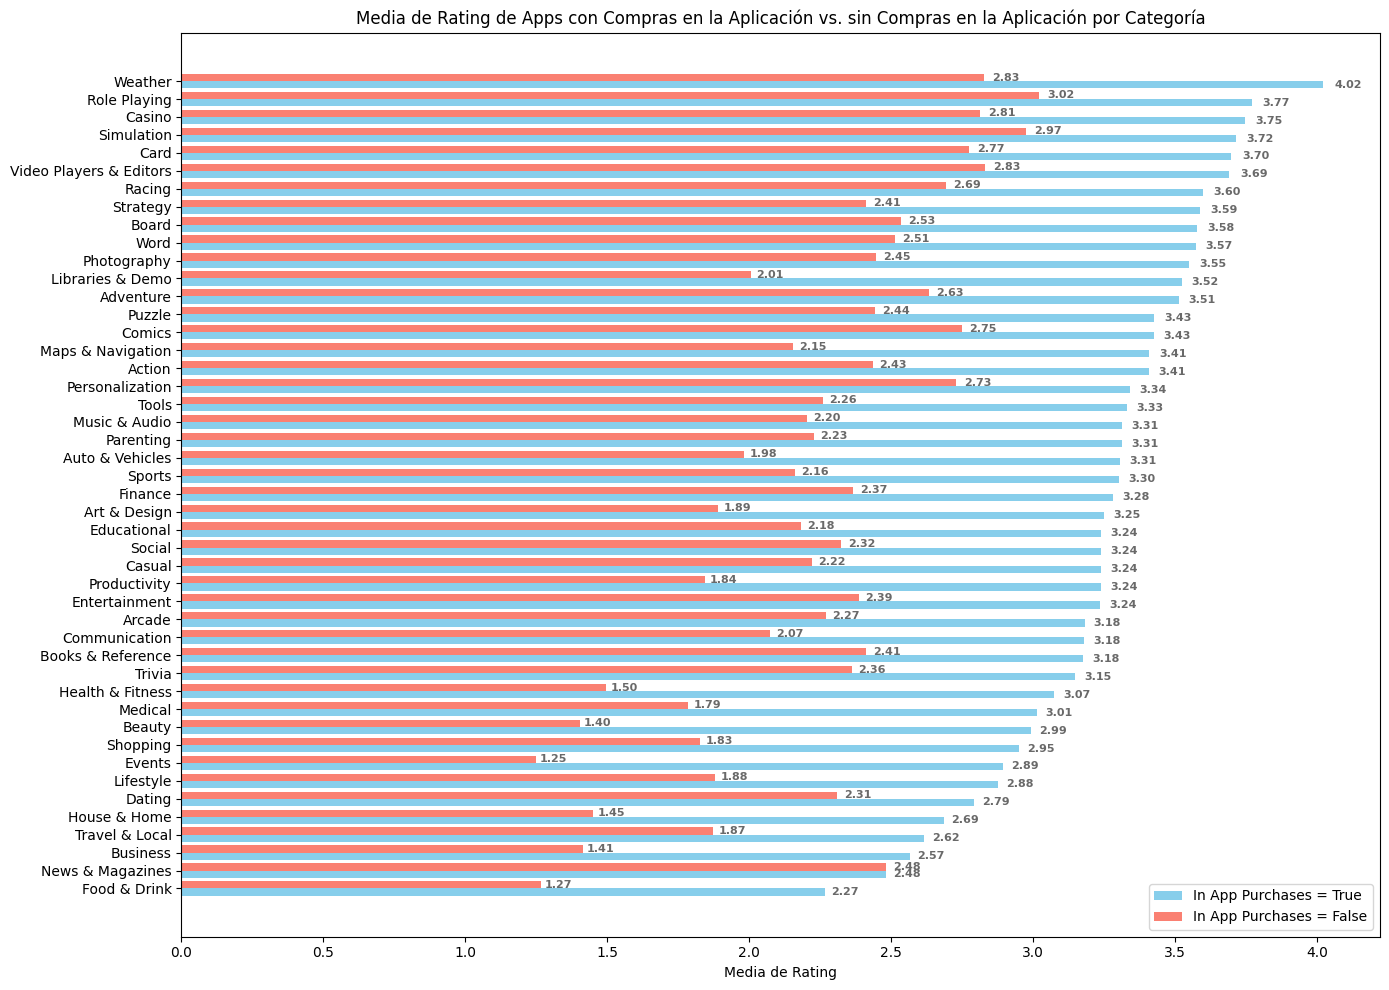

In [33]:
# Seleccionamos datos
ratings_clean = df.loc[df['Rating'] != "Unspecified"].copy()
ratings_clean['Rating'] = ratings_clean['Rating'].astype(float)

# Agrupar por categoría y compras en la aplicación
ratings_by_iap = ratings_clean.groupby(['Category', 'In App Purchases'])['Rating'].mean().unstack()

# Ordenar datos para mejor visualización
ratings_by_iap = ratings_by_iap.sort_values(by=True, ascending=True)

# Crea doble gráfico de barras horizontales
plt.figure(figsize=(14, 10))
bar_width = 0.4
index = range(len(ratings_by_iap))

# Barras azules representan con compras en la aplicación
bars_iap = plt.barh([i - bar_width/2 for i in index], ratings_by_iap[True], bar_width, color='skyblue', label='In App Purchases = True')

# Barras rojas representan sin compras en la aplicación
bars_no_iap = plt.barh([i + bar_width/2 for i in index], ratings_by_iap[False], bar_width, color='salmon', label='In App Purchases = False')

plt.yticks(index, ratings_by_iap.index)
plt.xlabel('Media de Rating')
plt.title('Media de Rating de Apps con Compras en la Aplicación vs. sin Compras en la Aplicación por Categoría')
plt.legend()

# Mostrar el valor fuera de la barra
for bars in [bars_iap, bars_no_iap]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + (width * 0.01), bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', color='dimgray', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()


En el gráfico sobre la media de rating según la presencia de compras en la aplicación, se observa que en todas las categorías, excepto News & Magazines (donde los valores son idénticos), las apps con compras integradas obtienen valoraciones claramente superiores. La diferencia suele ser considerable —en muchos casos superando los 1.5 puntos—, lo que sugiere que este modelo puede estar asociado a una mejor percepción de calidad o satisfacción por parte del usuario.

Este resultado también puede estar influido por el hecho de que la mayoría de las aplicaciones son gratuitas, por lo que están empujadas a implementar canales alternativos de fiannaciación. Esto hace que muchas de las apps más descargadas y mejor valoradas opten por este modelo. Por otro lado, aquellas sin compras integradas podrían corresponder a apps de pago, lo que podría limitar su alcance y hacer que el usuario sea más exigente al valorarlas o incluso que muchas pasen desapercibidas, afectando a su media de rating.

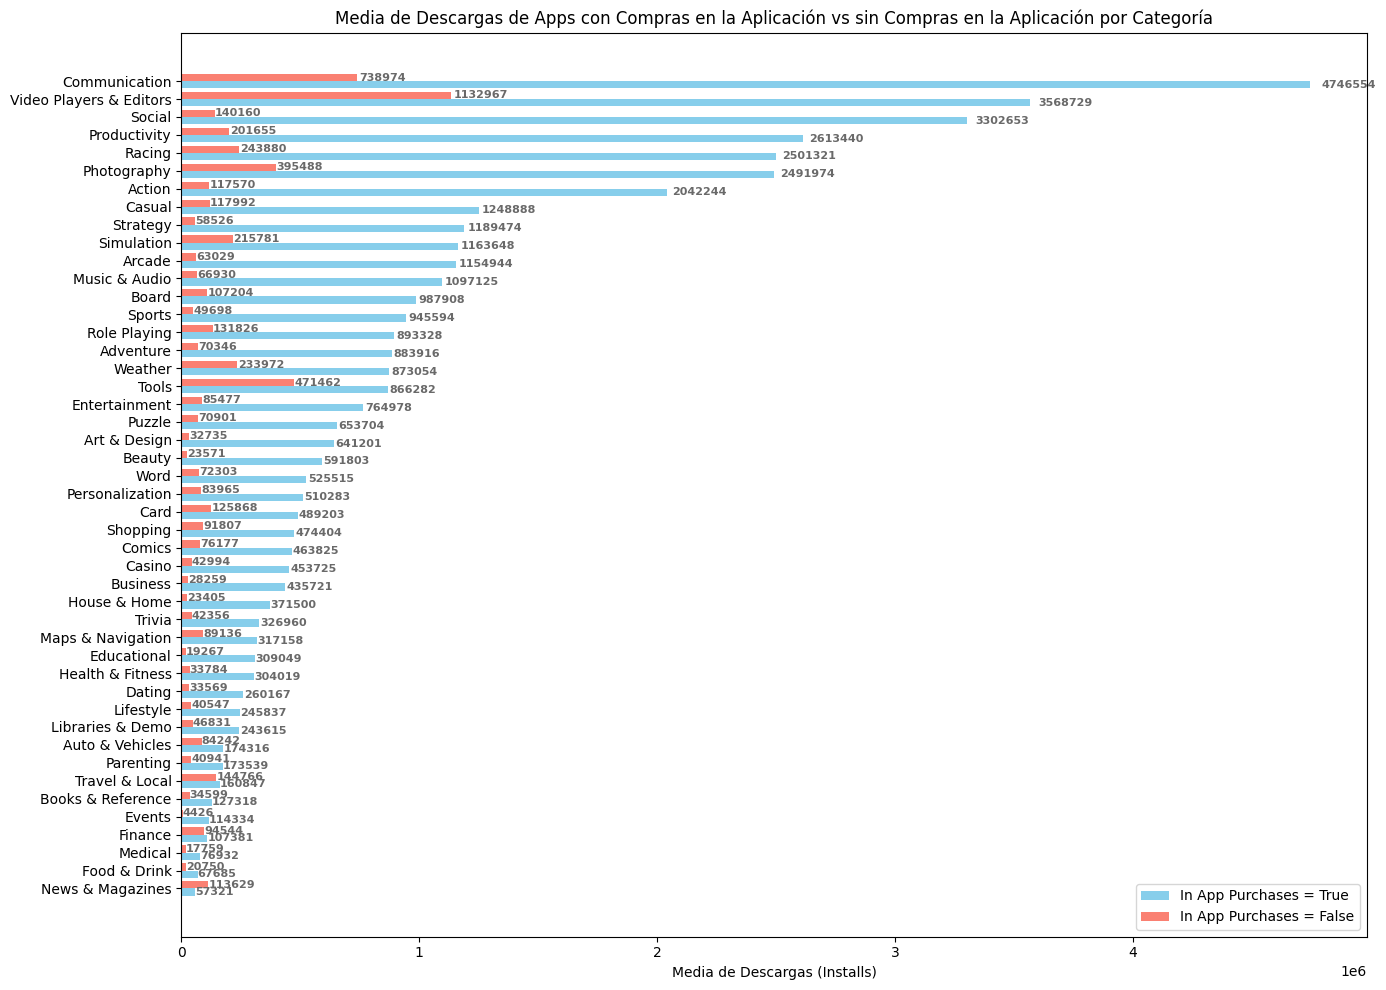

In [34]:
# Seleccionamos datos
installs_clean = df.loc[df['Installs'] != "Unspecified"].copy()
# Eliminamos el caracter "+" del final de cada valor
installs_clean['Installs'] = installs_clean['Installs'].str.replace(r'[+,]', '', regex=True).astype(float)

# Agrupar por categoría y compras en la aplicación
installs_by_iap = installs_clean.groupby(['Category', 'In App Purchases'])['Installs'].mean().unstack()

# Ordenar datos para mejor visualización
installs_by_iap = installs_by_iap.sort_values(by=True, ascending=True)

# Crea doble gráfico de barras horizontales
plt.figure(figsize=(14, 10))
bar_width = 0.4
index = range(len(installs_by_iap))

# Barras azules representan con compras en la aplicación
bars_iap = plt.barh([i - bar_width/2 for i in index], installs_by_iap[True], bar_width, color='skyblue', label='In App Purchases = True')

# Barras rojas representan sin compras en la aplicación
bars_no_iap = plt.barh([i + bar_width/2 for i in index], installs_by_iap[False], bar_width, color='salmon', label='In App Purchases = False')

plt.yticks(index, installs_by_iap.index)
plt.xlabel('Media de Descargas (Installs)')
plt.title('Media de Descargas de Apps con Compras en la Aplicación vs sin Compras en la Aplicación por Categoría')
plt.legend()

# Mostrar el valor fuera de la barra
for bars in [bars_iap, bars_no_iap]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + (width * 0.01), bar.get_y() + bar.get_height() / 2, f'{width:.0f}', va='center', ha='left', color='dimgray', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()


Los resultados muestran que las aplicaciones con compras integradas acumulan, de media, un número de descargas mucho mayor que las que no las tienen. Esto refuerza la idea anterior de que la mayoría de estas apps siguen un modelo freemium, donde la descarga es gratuita y la monetización se realiza mediante compras dentro de la aplicación. Por el contrario, las que no incluyen esta opción probablemente recurren a un modelo de pago directo, lo que puede limitar notablemente su volumen de descargas al suponer una barrera inicial para los usuarios.

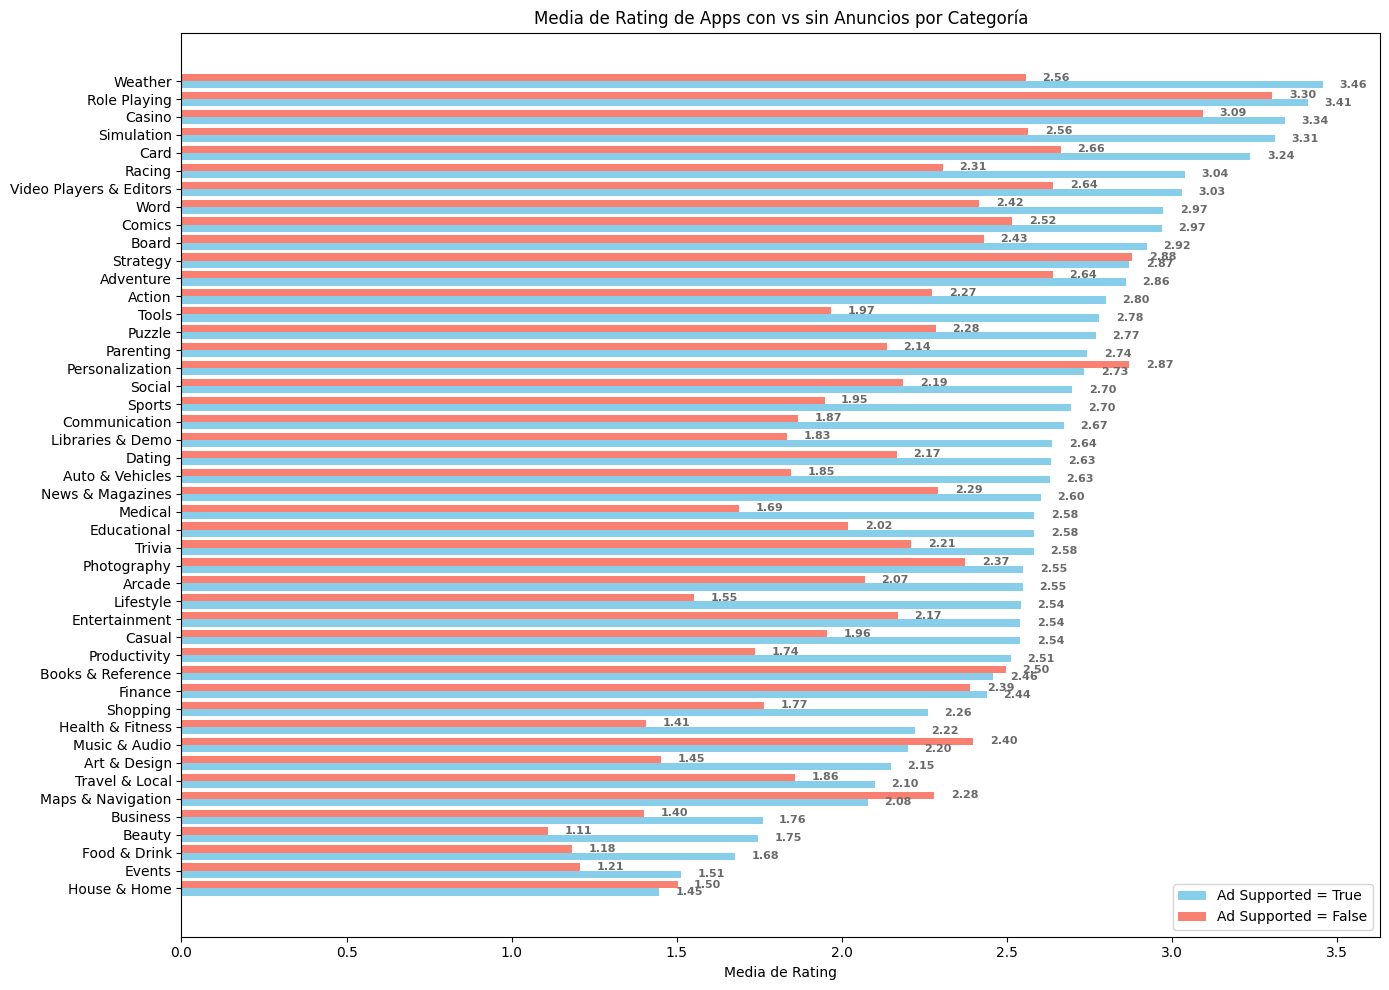

In [35]:
# Agrupar por categoría y anuncios
ratings_by_ads = ratings_clean.groupby(['Category', 'Ad Supported'])['Rating'].mean().unstack()

# Ordenar datos para mejor visualización
ratings_by_ads = ratings_by_ads.sort_values(by=True, ascending=True)

# Crea doble gráfico de barras horizontales
plt.figure(figsize=(14, 10))
bar_width = 0.4
index = range(len(ratings_by_ads))

# Barras azules representan con anuncios
bars_ads = plt.barh([i - bar_width/2 for i in index], ratings_by_ads[True], bar_width, color='skyblue', label='Ad Supported = True')

# Barras rojas representan sin anuncios
bars_no_ads = plt.barh([i + bar_width/2 for i in index], ratings_by_ads[False], bar_width, color='salmon', label='Ad Supported = False')

plt.yticks(index, ratings_by_ads.index)
plt.xlabel('Media de Rating')
plt.title('Media de Rating de Apps con vs sin Anuncios por Categoría')
plt.legend()

# Mostrar el valor fuera de la barra
for bars in [bars_ads, bars_no_ads]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.05, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', ha='left', color='dimgray', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()

En general, las aplicaciones que incluyen anuncios tienden a registrar una media de valoración superior a las que no los tienen, algo que podría explicarse porque suelen formar parte del grupo de apps gratuitas, como vimos anteriormente. Sin embargo, hay excepciones en categorías como Music & Audio, Maps & Navigation o Books & Reference, donde las valoraciones son mejores cuando no hay anuncios. Esto sugiere que, en ciertos contextos de uso, como escuchar música, consultar mapas o leer, la presencia de publicidad puede resultar especialmente molesta, afectando negativamente a la experiencia del usuario.

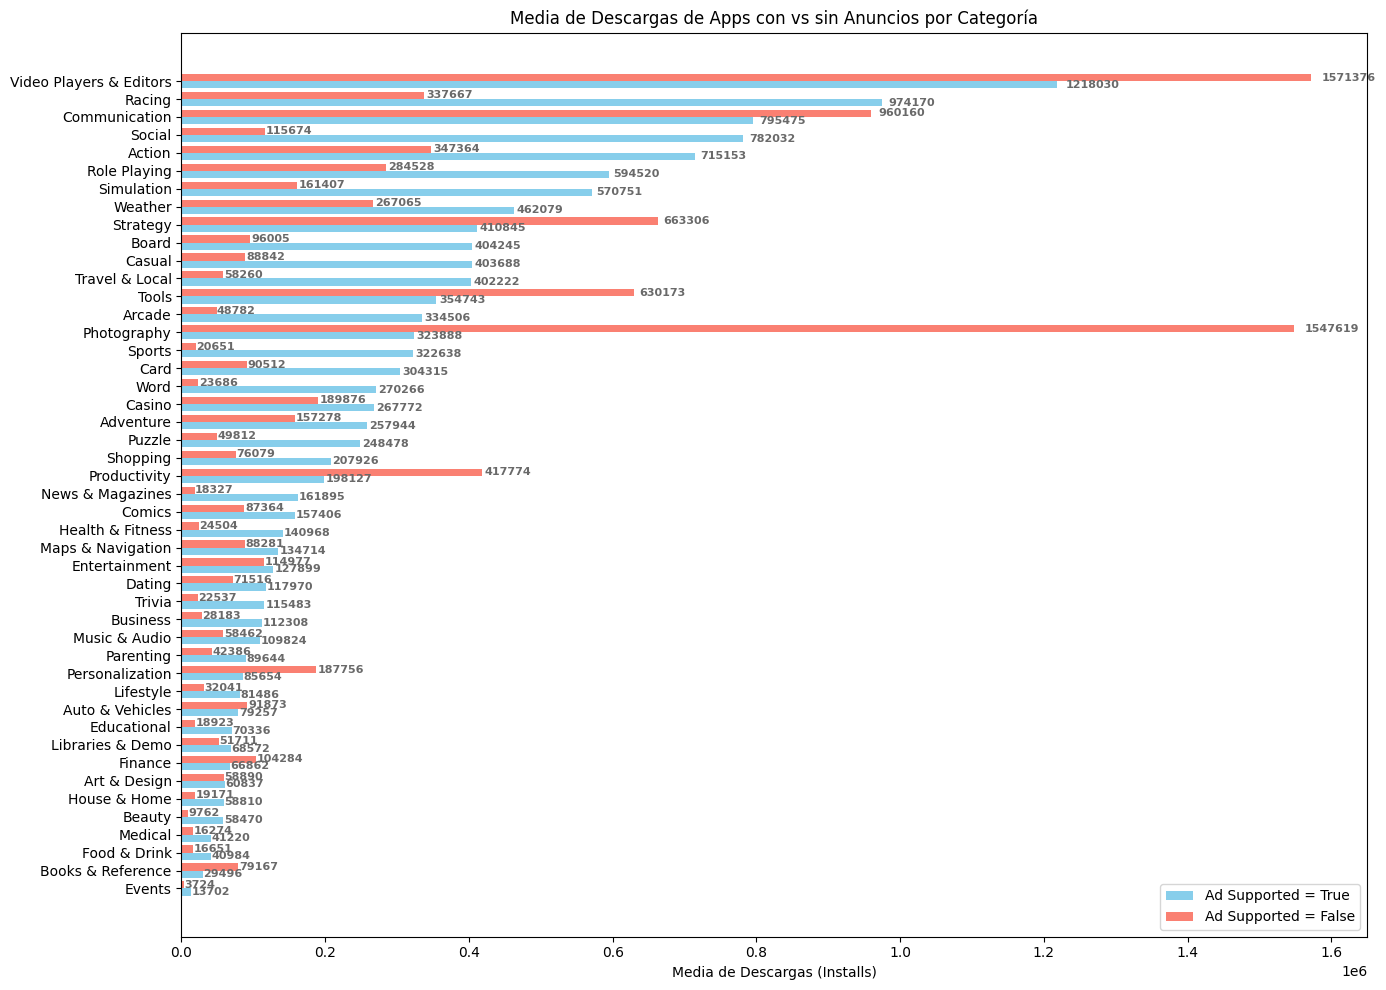

In [36]:
# Seleccionamos datos
installs_clean = df.loc[df['Installs'] != "Unspecified"].copy()

# Eliminamos el caracter "+" del final de cada valor
installs_clean['Installs'] = installs_clean['Installs'].str.replace(r'[+,]', '', regex=True).astype(float)

# Agrupar por categoría y descargas
installs_by_free = installs_clean.groupby(['Category', 'Ad Supported'])['Installs'].mean().unstack()

# Ordenar datos para mejor visualización
installs_by_free = installs_by_free.sort_values(by=True, ascending=True)

# Crea doble gráfico de barras horizontales
plt.figure(figsize=(14, 10))
bar_width = 0.4
index = range(len(installs_by_free))

# Barras azules representan con anuncios
bars_ads = plt.barh([i - bar_width/2 for i in index], installs_by_free[True], bar_width, color='skyblue', label='Ad Supported = True')

# Barras rojas representan sin anuncios
bars_no_ads = plt.barh([i + bar_width/2 for i in index], installs_by_free[False], bar_width, color='salmon', label='Ad Supported = False')

plt.yticks(index, installs_by_free.index)
plt.xlabel('Media de Descargas (Installs)')
plt.title('Media de Descargas de Apps con vs sin Anuncios por Categoría')
plt.legend()

# Mostrar el valor fuera de la barra
for bars in [bars_ads, bars_no_ads]:
    for bar in bars:
        width = bar.get_width()
        plt.text(width + (width * 0.01), bar.get_y() + bar.get_height() / 2, f'{width:.0f}',
                 va='center', ha='left', color='dimgray', fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()


Aunque las aplicaciones con anuncios suelen alcanzar un mayor número medio de descargas, coherente con la tendencia observada en las gratuitas, en este caso destacan diferencias notables en categorías concretas. En Video Players & Editors, Communication, Photography, Tools, Productivity y Personalization, las apps sin anuncios presentan medias de descargas mucho más altas.

Esto sugiere que, en aplicaciones orientadas a funciones prácticas o tareas concretas, los usuarios valoran especialmente una experiencia libre de interrupciones, lo que impulsa su popularidad y porsible recomendación por parte de los usuarios. Casos como WinRAR, herramienta para descomprimir archivos, o VLC Media Player, reproductor multimedia, ilustran bien esta preferencia en el mercado de utilidades.

# **Conclusiones**

---



## Conclusiones del análisis

Tras analizar en profundidad las diferentes variables del mercado de aplicaciones, hemos podido extraer las siguientes conclusiones acerca de las tendencias y patrones de la industria:

Durante el análisis general del mercado se reveló una clara tendencia a las valoraciones polarizadas. Los usuarios tienden a otorgar puntuaciones extremas, lo que subraya la importancia de mantener la calidad del servicio y atender las necesidades de los clientes. Las malas valoraciones pueden perjudicar seriamente la imagen de la empresa y dificultar la captación de nuevos usuarios.

En cuanto al estado de las aplicaciones, observamos que los porcentajes de apps deprecadas por categoría oscilan entre el 12 % y el 40 %. Los valores más altos se concentran en los videojuegos, un sector donde las apps suelen abandonarse si no logran atraer suficiente audiencia. Por el contrario, sectores como citas, comida y bebida o finanzas muestran menores tasas de deprecación, probablemente debido a su necesidad de adaptarse a tendencias o cambios normativos. Además, el mercado refleja una convivencia de aplicaciones con valoraciones muy bajas o muy altas, con escasez de valoraciones intermedias, lo que refuerza los hallazgos de polarización en las opiniones.

Respecto al modelo de negocio, la mayoría de aplicaciones son gratuitas, superando el 95 % en todas las categorías. Las apps de pago tienden a presentar mejores valoraciones, algo lógico considerando que para justificar su coste deben ofrecer un mayor valor al usuario.

El impacto de las compras dentro de la aplicación y los anuncios también es significativo. Las aplicaciones con compras integradas suelen tener mejores valoraciones y un mayor volumen de descargas, probablemente porque este modelo les permite ser gratuitas en el punto de entrada y monetizar posteriormente, lo que facilita atraer usuarios. Por su parte, las apps con anuncios también presentan mejores valoraciones en general, aunque existen categorías como Music & Audio, Maps & Navigation y Books & Reference donde se prefiere una experiencia sin interrupciones. En términos de descargas, las aplicaciones con anuncios suelen superar a las que no los tienen, salvo en categorías orientadas a herramientas específicas como Video Players & Editors, Communication, Photography, Tools, Productivity y Personalization, donde la ausencia de anuncios parece ser un factor clave para su éxito y popularidad.

## Opciones de mejora

Si bien el proyecto ha permitido identificar patrones interesantes en torno a las valoraciones, modelos de negocio y monetización, habría resultado de gran valor disponer de información sobre los ingresos o beneficios generados por las aplicaciones. Estos datos económicos habrían proporcionado una visión más completa del mercado, permitiendo conocer qué tipos de aplicaciones y estrategias ofrecen la mejor rentabilidad, así como cuáles son las mejores prácticas para mantenerse líder en cada subsector dentro de la industria.

Por otro lado, el análisis se ha basado en un conjunto de datos recogido únicamente en junio de 2021. Esto limita severamente la capacidad del estudio para analizar la evolución del mercado y observar cómo varían los comportamientos de usuarios y empresas en función de las tendencias, modas o la aparición de nuevos competidores a lo largo del tiempo.

## Conclusión Final

En conclusión, este proyecto ha permitido conocer mejor el mercado de las aplicaciones móviles y entender cómo influyen las valoraciones de los usuarios y los modelos de monetización en su éxito. Hemos visto que las apps gratuitas, apoyadas con estrategias de compras integradas o anuncios, no solo son mayoría, sino que también suelen conseguir mejores resultados en descargas y valoraciones. Aunque el análisis ha estado limitado por la falta de datos económicos y por centrarse en un único momento en el tiempo, las conclusiones obtenidas ayudan a comprender mejor las claves del mercado actual. Este trabajo puede servir como punto de básico de referencia para futuros desarrolladores o emprendedores que busquen posicionarse en el mercado competitivo de las apliciones móviles.

# **Referencias**

Documanetación Python: https://docs.python.org/3/

Documanetación pandas: https://pandas.pydata.org/docs/

Documanetación matplotlib: https://matplotlib.org/stable/index.html

Documanetación google play scraper: https://pypi.org/project/google-play-scraper/

Enlace dataset Kaggle: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps

# **Uso de la IA**

La IA generativa se ha utilizado en este proyecto primariamente para el apoyo en la redacción y en la elaboración de los gráficos, especialmente en los detalles de los mismos.

Puntualmente también se ha utlizado para resolver bugs o comportamientos anómalos del código durante el desarrollo.

[Enlace a la conversación con ChatGPT](https://chatgpt.com/share/687be83c-b850-800f-801b-33e7b271b2e3)